In [2]:
import numpy as np  
import pandas as pd  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [4]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [5]:
r = 0.025

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [7]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([ 0.17610875])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[  88.118629  ,   88.118629  ,   88.118629  , ...,   88.118629  ,
          88.118629  ,   88.118629  ],
       [  88.81636639,   90.61639177,   89.03898033, ...,   87.30375254,
          87.5583302 ,   88.80166136],
       [  86.90009657,   91.62555653,   89.63268689, ...,   88.33679858,
          87.62299858,   91.35123942],
       ..., 
       [  84.3786526 ,  107.72224183,   80.82567392, ...,  125.62838195,
          89.32732597,  105.18086595],
       [  84.3872724 ,  108.28857142,   81.12333622, ...,  125.84132277,
          90.90533155,  105.51622291],
       [  83.67055401,  107.96691607,   81.7082641 , ...,  125.94172348,
          91.80990436,  104.04308705]])

In [12]:
S.shape

(251L, 10000L)

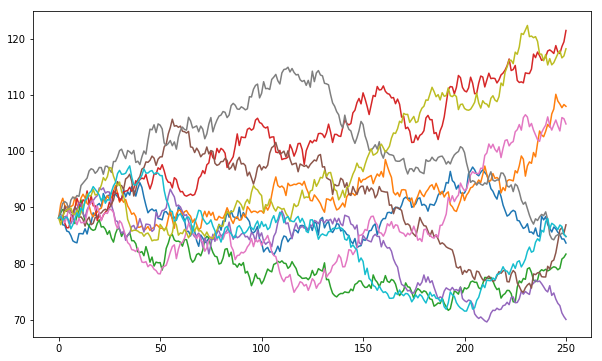

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);